In [22]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix,roc_curve
from sklearn.metrics import precision_score,recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix,roc_curve, multilabel_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('milknew.csv')
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [5]:
df['Grade'].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

## Train Test Split

In [6]:
x = df.drop('Grade',axis = 1)
y = df['Grade']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=11,stratify=y)

In [7]:
y_train.value_counts()

low       322
medium    280
high      192
Name: Grade, dtype: int64

In [8]:
y_test.value_counts()

low       107
medium     94
high       64
Name: Grade, dtype: int64

## Model Training

In [16]:
logistic_model = LogisticRegression(multi_class= 'ovr')
logistic_model.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

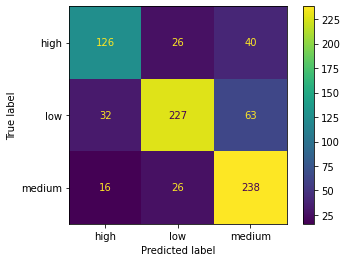

In [17]:
plot_confusion_matrix(logistic_model,x_train, y_train)

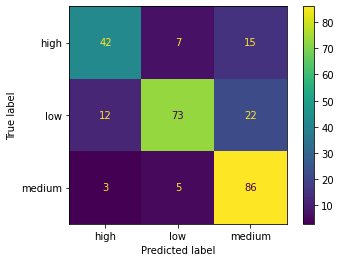

In [18]:
plot_confusion_matrix(logistic_model,x_test, y_test)

In [19]:
logistic_model.score(x_train, y_train)

0.7443324937027708

In [20]:
logistic_model.score(x_test, y_test)

0.7584905660377359

## Model Evaluation

In [23]:
y_pred = logistic_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print("MultiLabel Confusion Matrix :\n",multilabel_cnf_matrix)
print("*"*88)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print("*"*88)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[42  7 15]
 [12 73 22]
 [ 3  5 86]]
****************************************************************************************
MultiLabel Confusion Matrix :
 [[[186  15]
  [ 22  42]]

 [[146  12]
  [ 34  73]]

 [[134  37]
  [  8  86]]]
****************************************************************************************
Accuracy : 0.7584905660377359
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

        high       0.74      0.66      0.69        64
         low       0.86      0.68      0.76       107
      medium       0.70      0.91      0.79        94

    accuracy                           0.76       265
   macro avg       0.76      0.75      0.75       265
weighted avg       0.77      0.76      0.76       265



In [24]:
# Training Data Evaluation
y_pred_train = logistic_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_train, y_pred_train)
print("MultiLabel Confusion Matrix :\n",multilabel_cnf_matrix)
print("*"*88)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print("*"*88)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[126  26  40]
 [ 32 227  63]
 [ 16  26 238]]
****************************************************************************************
MultiLabel Confusion Matrix :
 [[[554  48]
  [ 66 126]]

 [[420  52]
  [ 95 227]]

 [[411 103]
  [ 42 238]]]
****************************************************************************************
Accuracy : 0.7443324937027708
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

        high       0.72      0.66      0.69       192
         low       0.81      0.70      0.76       322
      medium       0.70      0.85      0.77       280

    accuracy                           0.74       794
   macro avg       0.75      0.74      0.74       794
weighted avg       0.75      0.74      0.74       794



## Predict on single Row

In [29]:
x_test.iloc[5]

pH              8.6
Temprature     55.0
Taste           0.0
Odor            1.0
Fat             1.0
Turbidity       1.0
Colour        255.0
Name: 878, dtype: float64

In [30]:
pH  = 9.6
Temprature =45.0
Taste   =  0.0
Odor  =  2.0
Fat =  2.0
Turbidity =  1.0
Colour =255.0

test_array = np.array([[pH,Temprature,Taste,Odor,Fat,Turbidity,Colour]])
test_array
predicted_class = logistic_model.predict(test_array)[0]
predicted_class

'high'

In [40]:
project_data = {'columns' : list(x.columns)}
project_data

{'columns': ['pH',
  'Temprature',
  'Taste',
  'Odor',
  'Fat ',
  'Turbidity',
  'Colour']}

In [31]:
y_pred_train[:5]

array(['high', 'medium', 'low', 'low', 'high'], dtype=object)

In [32]:
y_train[:5]

862       low
226    medium
644       low
195       low
587      high
Name: Grade, dtype: object

In [43]:
np.around(logistic_model.predict_proba(x_train),6)

array([[6.25531e-01, 3.49371e-01, 2.50980e-02],
       [2.73968e-01, 1.90529e-01, 5.35503e-01],
       [4.70850e-02, 7.89499e-01, 1.63416e-01],
       ...,
       [2.74685e-01, 7.20764e-01, 4.55100e-03],
       [2.32095e-01, 7.53183e-01, 1.47220e-02],
       [2.40000e-05, 9.99951e-01, 2.60000e-05]])

In [37]:
import pickle

with open("logistic_model.pkl",'wb') as f:
    pickle.dump(logistic_model,f)

In [41]:
import json

with open("project_data.json",'w') as f:
    json.dump(project_data,f)